In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.5.0
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
matplotlib 3.4.2
numpy 1.19.5
pandas 1.3.0
sklearn 0.24.2
tensorflow 2.5.0
tensorflow.keras 2.5.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])
model.summary()
model.compile(loss=customized_mse, optimizer="sgd",
             metrics="mean_squared_error")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


2021-08-01 10:01:33.936710: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 10,
                    callbacks = callbacks)

2021-08-01 10:01:34.128617: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.7642 - mean_squared_error: 0.7642 - val_loss: 0.6749 - val_mean_squared_error: 0.6749
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.0059 - mean_squared_error: 1.0059 - val_loss: 0.5308 - val_mean_squared_error: 0.5308
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mean_squared_error: 0.5033 - val_loss: 0.4464 - val_mean_squared_error: 0.4464
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4159 - mean_squared_error: 0.4159 - val_loss: 0.4189 - val_mean_squared_error: 0.4189
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4018 - mean_squared_error: 0.4018 - val_loss: 0.4071 - val_mean_squared_error: 0.4071
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4035 - mean_squared_error: 0.4035 - val_loss: 0.4002 - val_mean_squared_error: 0.4002
Epoch 7/10
363/363 [========

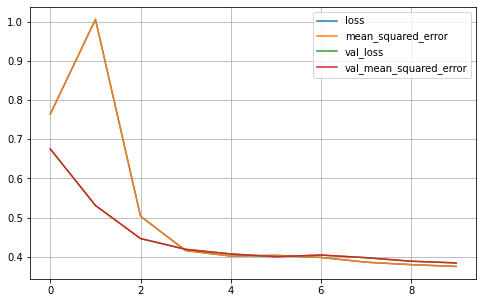

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
#     plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [8]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 980us/step - loss: 0.3940 - mean_squared_error: 0.3940


[0.3939659297466278, 0.3939659297466278]